In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy.signal import decimate
from comp28512_utils import Audio
from numpy import fft
from scipy.fftpack import dct
from scipy.fftpack import dct, idct
from tempfile import TemporaryFile as tf

def plotme(x,y,labelX,labelY,graphName):
    plt.plot(x,y)
    plt.title(graphName)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()

    
def plotmeaSpectrum(x,y,labelX,labelY,graphName):
    fig = plt.figure(figsize=(18, 5))
    vax = fig.add_subplot(121)
    #vax.plot(x,y)
    vax.vlines(x, [0], y)
    plt.title(graphName)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()

    
def sin(Fs, f, harmonics):
    T = 1.0/Fs
    x = np.arange(500)
    y = np.zeros(500)
    for k in range(1, harmonics):
        if (k%2) == 1:
            y += (1.0 / k) * np.sin(2 * np.pi *  f * k * T * x)
    return y


def cos(Fs, f,harmonics):
    T = 1.0/Fs
    x = np.arange(500)
    y = np.zeros(500)
    for k in range(1, harmonics):
        if (k%2) == 1:
            y += (1.0 / k*k) * np.cos(2 * np.pi *  f * k * T * x)
    return y


def sinPhase(Fs, f,harmonics):
    T = 1.0/Fs
    x = np.arange(500)
    y = np.zeros(500)
    for k in range(1, harmonics):
        if (k%2) == 1:
            if k == 3:
                y += (1.0 / k) * np.sin(2 * np.pi *  f * k * T * x + np.pi / 2)
            else:
                y += (1.0 / k) * np.sin(2 * np.pi *  f * k * T * x)
    return y


def makeFourier(audio, Fs):

    #init
    length = 500
    x = np.arange(1,length+1)
    
    #compute rate of Fourier
    scaledT = length / float(Fs) # 1/Fs,2/Fs,3/Fs ... n/Fs
    fourierFrequency = x / scaledT
    
    #apply fft and reduce amplitude
    Fourier = fft.fft(noise[1:501])/length
    
    return  fourierFrequency, Fourier

# Task 2.1 Fourier Series

##### Part a 
Plot a Fourier Series from a sum of sin where F = 500 Hz and the number of harmonics for every sample is 15, over a number of 500 samples. 

We only plot the odd harmonics here.

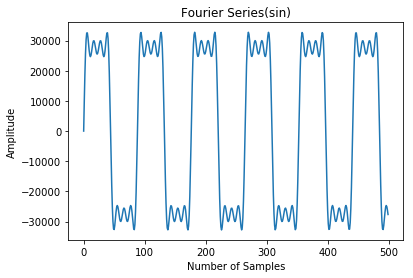

In [43]:
y = np.zeros(500)
x = np.arange(500)
y = sin(44100, 500, 15)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','Fourier Series(sin)')

##### Part b
Plot a Fourier Series from a sum of cosine where F = 500 Hz and the number of harmonics is 15 for every sample, over a number of 500 samples.

We only plot the odd harmonics.

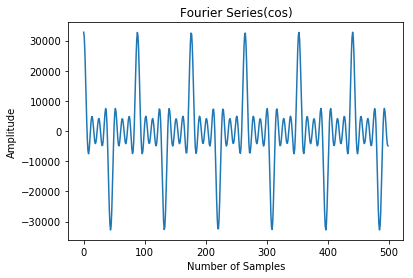

In [44]:
y = np.zeros(500)
x = np.arange(500)
y = cos(44100, 500, 15)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','Fourier Series(cos)')

##### Part c
Plot a Fourier Series from a sum of cosine where F = 500 Hz and the number of harmonics is 15 for every sample, over a number of 500 samples.

We only plot the odd harmonics and every third harmonic we add a phase of π/2 to the wave.

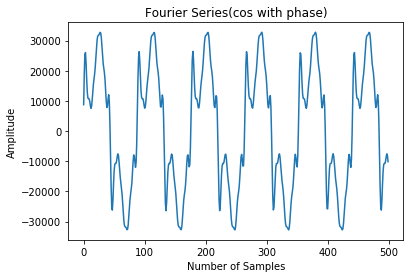

In [5]:
y = np.zeros(500)
x = np.arange(500)
y = sinPhase(44100, 500, 15)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','Fourier Series(cos with phase)')

### Q2: What would you expect the wave forms to look like if you could take an infinite number of terms?

The more harmonics we take the closed the waveform gets to look like the original wave.

An example is illustrated below.

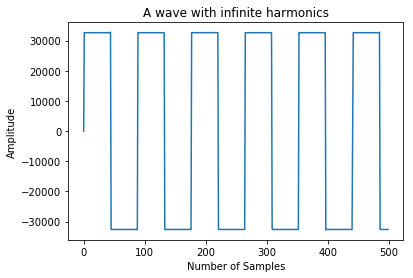

In [6]:
y = np.zeros(500)
x = np.arange(500)
y = sin(44100, 500, 10000)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','A wave with infinite harmonics')

### Q3: In what way are waveforms (a) and (c) similar and different?

The first and the third waves are similar in the way that, in the waveform (c), when the harmonic in everysample is not equal to 3 the amplitude is the same for both waveforms and when it is 3, they differ.

### Q4: Why might waveforms (a) and (c) soud similar over an analog telephone line?

Both (a) and (c) are sine waveforms and therefore they have the same amplitude at the same time. So it might be the case that over a low quality telephone line, both waves could be heard as the same.

### Q5: If the waveform in (a) represented a sequence of pulses sent over an analog telephone line to represent a stream of bits, and the harmonics were affected by phase distortion to produce waveform (c), why might this cause a problem at the receiver?

# Task 2.2 Frequency - domain processing

· Read the file and first select the first 500 samples from the wav file to manipulate.

· First plot represents the segment of 500 samples in the time domain.

· Apply the method makeFourier() to these samples: 
    
    The makeFourier() method:
    
        · first rescales the time variable to be n/Fs; where n is the number of samples
        
        · then apply fft() and divide by the number of sample for more accurate magnitude of frequencies
 
· After applying the method, plot the spectrogram with only half the number of frequencies.

· In order to apply the threshold loop trough the frequencies and if we find an value that has the absolute equal to the threshold we zero it out.

· Plot the spectogram without the noise and finally apply the Inverse Fourier Transformation and plot the 500 samples of the new sound

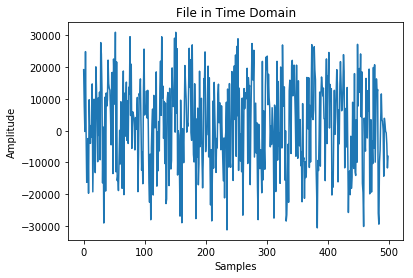

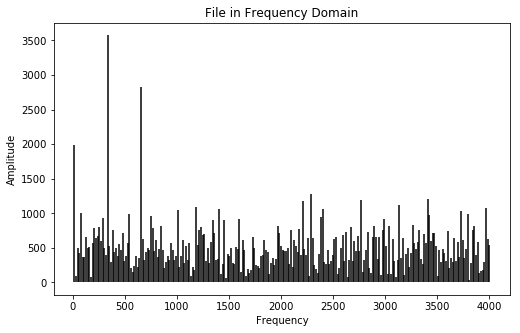

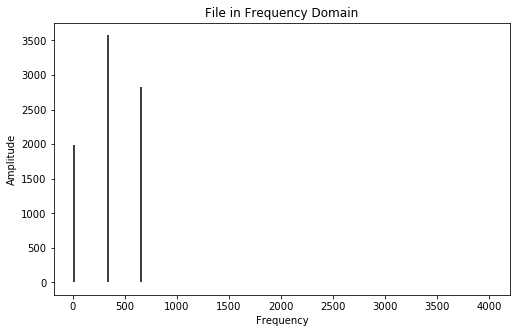

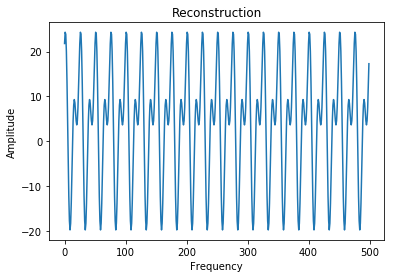

In [8]:
#read file to be processed
(Fs, noise) = wavfile.read("noisySinewave.wav")


#select 500 samples and plot
numberOfSamples = 500
x = np.arange(numberOfSamples)
plotme(x, noise[1:501],'Samples','Amplitude','File in Time Domain')


#now apply makeFourier() and plot 
rate,Fourier = makeFourier(noise, Fs)#rateForPlot[0:length/2];[0:length/2]
plotmeaSpectrum(rate[0:numberOfSamples/2], np.abs(Fourier)[0:numberOfSamples/2],'Frequency','Amplitude','File in Frequency Domain')


#based on the absolute value of the result delete unnecessary/noisy frequencies based on the threshold
threshold = 1500
ModFourier = np.absolute(Fourier)
for i in range(0,len(rate)):
    if ModFourier[i] <= threshold:
        Fourier[i] = 0

        
#we again plot the absolute values of the fft with the zeroed values
ModFourier = np.absolute(Fourier)
plotmeaSpectrum(rate[0:numberOfSamples/2], np.abs(ModFourier)[0:numberOfSamples/2],'Frequency','Amplitude','File in Frequency Domain')


#finally we apply the inverse function and plot the reconstructed samples
y = fft.ifft(Fourier)
y = np.real(y)
plotme(x, y,'Frequency','Amplitude','Reconstruction')

### Q1: Is the resulting processed signal real, i.e. does it have zero imaginary part?

No. The processed signal is a complex number after applying the FFT. We need to take only the real part from it in order to plot or listen to it.

In the DCT Transform we do not get such result. We only get real numbers

### Q2: Has any of the noise been removed by this 'spectral subraction' process?

The operation of choosing a threshold and deleting every frequency below it removes

### Q3: What Fourier series components are present in the characteristic periodic sound?

# Task 2.3 Transforming music files  to and from the frequency domain

· First we plot a sine wave in both time and frequency domains to test the DCT function.

· I generate a sine-wave segment of 1024 samples at Fs=44.1 kHz and then apply it to the DCT.

· Plotting the DCT result we observe the frequency of the wave at 1000 Hz as we've set it

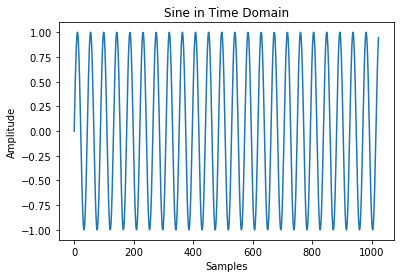

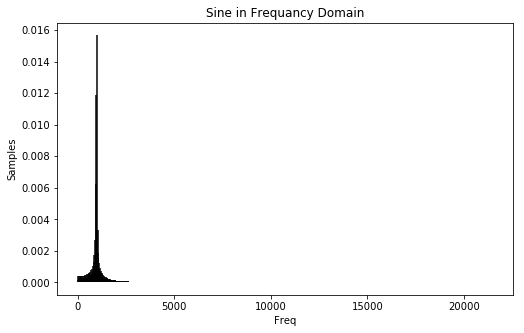

In [14]:
# take 1024 samples 
x = np.arange(1024)


# set up 
Fs = 44100
f = 1000
T = 1.0/Fs
y =  np.sin(2 * np.pi * f * x * T)


# plot the sine
plotme(x,y,'Samples','Amplitude','Sine in Time Domain')


# apply DCT and plot result
y = dct(y, norm='ortho')
plotmeaSpectrum(x * (Fs / (2 * 1024)),np.abs(y)/1024,'Freq','Samples','Sine in Frequancy Domain')

We continue by analysing a vivaldi sound file

In [46]:
#read file to be processed
Fs,wave = wavfile.read("SVivaldi44.1mono.wav")
print 'Original audio file: '
Audio(wave, rate = Fs)

#set up
numberOfSegm = 500
numberOfSamples = 1024
x = np.arange(numberOfSegm * numberOfSamples)


#apply dct on segments
result = []
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    result = np.hstack((result,dct(seg, norm='ortho')))


#file output
outfile = tf()
np.save(outfile,result)
outfile.seek(0)
vivaldiFile = np.load(outfile)


# apply idct 
resultVivaldi = []
for segment in range(0,numberOfSegm):
    seg = vivaldiFile[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    resultVivaldi = np.hstack((resultVivaldi, idct(seg, norm='ortho')))
    
# scale up to 16bit values and output
resultVivaldi = resultVivaldi / np.amax(np.abs(resultVivaldi))
resultVivaldi = np.round((resultVivaldi * (2 ** 16 - 1) / 2) - 0.5)
resultVivaldi = np.int16(resultVivaldi)
print 'Audio file after DCT and IDCT: '
Audio(resultVivaldi, rate = Fs)

Original audio file: 
Data written to /tmp/comp28512_QrkXOZ.wav.


<source src="data:audio/wav;base64,UklGRqb1IABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YYL1IADd/9f/1v/Y/9n/0//X
/9//3//c/9v/3v/Z/9f/3//b/+H/5f/m/+f/5f/j/93/1v/V/8//0P/R/9L/1//U/9b/2//b/93/
4f/j/97/2f/V/83/zP/Q/9b/3P/g/93/0v/P/9L/1v/e/+X/4//d/9P/yv/L/9b/2//c/9v/1v/T
/8v/xv/H/8j/zv/T/9f/1//Y/8//vv++/8H/yP/S/9n/2//Z/9f/1P/X/+D/6f/p/+7/7//u/+r/
5//m/+r/7v/s/+f/4f/c/9n/1P/X/+H/5f/n/+T/3f/Y/9P/zv/P/9T/3f/f/93/3P/c/9n/1f/c
/+L/6v/x//T/8//w/+n/4f/f/9v/4f/q/+7/8v/y/+v/5f/h/9v/2//e/9//3//e/+D/2//P/8f/
x//M/9P/1v/V/9L/yf/K/8//0//Z/97/5f/m/+H/4v/e/9//2v/U/9T/3P/j/+L/3//f/93/3//c
/9j/1f/R/9L/0P/L/8//z//Q/83/yP/D/8L/xf/M/9n/2//d/9z/2v/c/93/3v/d/9z/3v/h/+T/
5P/k/+P/3//d/9//2//Z/9b/0f/Q/8v/w//D/8L/wf/C/8T/w//A/8H/wv/A/8P/yP/J/8f/yP/H
/8b/y//M/9L/1P/O/8z/0P/Z/+D/4//i/9z/2P/U/8//1//b/9v/1//S/8n/yv/N/8v/yP/D/77/
t/+1/7r/wv/L/9H/0v/W/8//xv/O/9H/0P/P/9D/0f/N/83/zf/S/9b/0P/P/9L/1v/U/8//yP/E
/8j/y//I/8T/wP+8/7n/tf+3/7v/vv+6/7v/vf+4/7z/vv+//73/u/+6/7b/tv+z/6//s/+3/7z/
xP/P/9T/z//L/8f/xP/C/8T/zf/P/9H/0v/L/8j/xv/J/9L/0v/Y/9v/2//Z/9D/0P/V/9L/0//U
/8//0P/X/+D/4//j/+T/4P/j/+b/5v/r/+//7P/k/9//3f/d/97/4v/h/+D/3//Z/9f/1f/Q/9D/
0f/Y/9//2v/X/9L/zf/L/8v/1f/g/+P/4//d/9j/1//U/9f/3P/j/+v/7P/o/+f/5P/e/9v/3P/i
/+T/4v/f/9z/3P/a/9z/3v/e/+D/4P/d/+L/3//c/9j/2//f/+j/7v/o/+T/4v/k/+j/9P8CAAkA
BwD6//D/5P/l/+//9v8DAAcA/v/s/9z/2f/g/+r/9f/8//7/9v/o/9r/1//g/+H/5f/q/+7/8f/r
/+j/5//m/+//9/8FAA0ACQD9//D/7//r/+r/8v/0//f/+P/z/+z/7v/y//P/8f/v/+n/6//p/+T/
5P/m/+f/6P/l/+P/4//j/+X/5f/v//b/+P/1//D/7f/r//D/7v/t/+7/7P/v//H/8v/y/+7/9P/3
//X/9P/q/+z/8//2//j/+v////v/7//m/+j/9P/9////AgADAP7/9//1//r//P/+//z//P8AAAEA
BAAHAAYACQAHAP7//v8DAAkADQAJAAkABgAAAPf/9v/4/wAACAAEAAcAAQD6//f/8//2/wAADwAV
ABkAGQAVABAAEgAWABsAIgAlAC4ALQAmACAAGQAeACIAIwAoAC0AMQAtACYAHwAcABYAEwARABgA
HAAcABYAFAAZAB8AJQAhACAAHQAbABkAFAAaAB8AHAAeACEAJgApACYAJAAoACwAKwAqACkALQAw
AC8ALgA1ADgANgAzADIAMAArACcAJwAsACwAJwAfAB4AJQAvADIAMQA1ACwAIwAlACwAOgBIAEsA
RQA7ADAAMAA3AEAASwBPAEoAQwBEAEoASQBAADsANgA8AEUASQBNAEwAQQAzACoAKAApADMARQBM
AFEAUABIAEIANwA1ADUAOABFAFAATQBAADUAMwA2AEIAUgBXAFQARwA+ADwAQABFAEgAQwBBAD4A
NgA6AEIAQwA+ADgALwArADAAOwBDAEQAQAA2ADAAKwAxADkARQBKAEIAPgA2ADMAMgA2AD0AOwA5
ADcANAA6ADoANwA2ADAAMAA1ADwAPQA8ADoAOwA7ADkAOgBAAD4AOQA7ADoAPAA5ADUAMgA0ADgA
OAA5ADYAMgAuAC4AMwA9AEMARAA8ADYAMwAvADAAMQA2ADYAMgAzADUANwAwACkAKwAuAC4AMQAw
ADEALQApACgAJgAwADwAPwA+ADkAOAAwACsANQA5ADoAPAA8ADsAMAAsACkAJwArADMAOwA6ADkA
NgAxACwAMwA9AEYARwBIAEkARgBFAEEAQQBHAFAAWgBbAFkAVABLAEIAPQBCAEkAUQBWAFQAUwBN
AEEAOgA5ADoAPwBCAE0AUwBPAEoARwBHAEkATwBSAFUAWgBdAFQATQBLAE4AUwBXAF4AYQBZAEgA
PQBEAE4AVgBZAFsAVwBSAE0ASQBKAFAAUgBYAFsAWQBYAFYAVABZAGAAaQBxAHEAbgBnAF8AWwBi
AGwAbQByAHMAaQBhAF4AXwBfAGIAYgBdAFkAVQBTAE8ASgBKAFIAVwBaAFsAWwBZAFgAVwBXAFoA
XABZAFoAWwBZAFsAXwBmAGYAYgBcAFoAXgBnAGkAZwBgAFoAWABVAFoAWwBaAFgAUABQAE0ATQBS
AFAAUQBQAFAAUABQAFMAVQBTAFIAUABOAE4AUQBTAFEAUgBQAE4ATQBSAFcAVQBSAEwAQAA5AD8A
QQBLAFUAUgBKAEEAPAA/AEUASwBMAEoAQgA8AEAAQgBHAE8AUABOAE0ARwA/ADsAQgBMAFEAUwBM
AEQAOwA3ADsAQwBMAE8ATABKAEcARQBFAEYATwBRAFAATgBLAEgASABOAFEAVABRAEwARwBFAEgA
UABWAFcAVgBQAEgARABGAEkAUABUAEwARwBHAEkATwBVAFEAUQBPAE8AVQBbAFoAWQBVAFEAVgBe
AGEAYABiAFYASgBHAEsAUABUAFkAVABQAEkAQwBBAEUAUABbAGIAXwBcAFIARwBEAE0AXABgAGMA
YABZAEwARABFAEsAWABeAFkAUgBKAEQARwBJAFMAWgBZAFIAUwBWAFkAXQBgAGMAYgBeAFwAYQBo
AG0AawBnAGcAZgBjAGMAZgBvAHIAaQBkAGMAXABWAFsAYQBjAGAAWwBXAFoAYABkAGYAZQBiAFwA
WgBbAGAAZQBlAGEAYgBkAGcAaQBqAG4AbwBsAGkAagBnAGkAawBoAGcAZABdAF0AYgBoAGsAZwBi
AGMAYgBcAF0AXgBgAGkAawBsAHMAdgByAHMAdQBxAG0AbQBqAGwAcwB0AHUAcQBwAG4AaQBnAGMA
YwBiAF8AYQBiAGAAYABeAGEAZABhAGEAWgBaAFsAWwBfAGEAXwBdAFgAWgBdAF8AYABfAGAAYQBi
AGMAZgBjAGIAYQBfAF8AXQBYAFkAWgBdAGIAYQBgAFsAWABWAFEATwBNAFQAWwBZAFgAUABGAEMA
RQBNAFcAWABbAFsAWABRAE0AVABVAFEAVgBaAFcAVQBWAFYATgBLAEwATABOAFkAYQBhAFkATgBJ
AEoARgBLAFYAXQBeAFgAVABQAE0ATgBTAFwAYQBhAGIAXgBYAFEATwBQAFMAUwBVAFkAWQBYAFUA
VwBZAFgAVQBWAFQAUwBUAFAASwBNAFIAVwBeAF4AYABaAFEAUgBRAFIAUwBbAGEAXwBWAEkARABJ
AE0AWQBkAGkAZgBaAFEAUwBWAFkAXgBbAFoAWQBWAFQAVgBcAF4AXwBbAFoAWwBZAFUAVwBYAFIA
VABUAFcAXABUAEkAQQA/AEEAQwBMAFIAVABQAEkARQBAADwAPgBGAEwATQBPAEsAQwBDAEMARgBN
AFQAWABQAEQAPQA9AEMASABPAFIASwBEAEAAQg

Audio file after DCT and IDCT: 
Data written to /tmp/comp28512_jFC2L5.wav.


<source src="data:audio/wav;base64,UklGRiSgDwBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YQCgDwBC/vb96f0D/hD+w/32
/Vz+XP42/in+T/4Q/vb9XP4p/nX+qP61/sL+qP6P/kL+6f3d/ZD9nf2q/bf99v3Q/en9Kf4p/kL+
df6P/k/+EP7d/Xf9av2d/en9Nv5p/kL+t/2Q/bf96f1P/qj+j/5C/sP9Uf1e/en9Kf42/in+6f3D
/V79Hv0r/Tf9hP3D/fb99v0D/pD9uPy4/N78N/23/RD+Kf4Q/vb90P32/Wn+2/7b/hv/J/8b/+j+
wv61/uj+G/8B/8L+df42/hD+0P32/XX+qP7C/pv+Qv4D/sP9hP2Q/dD9Qv5c/kL+Nv42/hD+3f02
/oL+6P5B/2f/Wv80/9v+df5c/in+df7o/hv/Tf9N//T+qP51/in+Kf5P/lz+XP5P/mn+Kf6Q/Sv9
K/1q/cP96f3d/bf9RP1R/ZD9w/0Q/k/+qP61/nX+gv5P/lz+HP7Q/dD9Nv6P/oL+XP5c/kL+XP42
/gP+3f2q/bf9nf1e/ZD9kP2d/Xf9N/34/Ov8Ef1q/RD+Kf5C/jb+HP42/kL+T/5C/jb+T/51/pv+
m/6b/o/+XP5C/lz+Kf4Q/un9qv2d/V79+Pz4/Ov83vzr/AX9+PzS/N786/zS/Pj8N/1E/Sv9N/0r
/R79Xv1q/bf90P2E/Wr9nf0Q/mn+j/6C/jb+A/7Q/ZD99v0p/in+9v23/UT9Uf13/V79N/34/Lj8
X/xG/IX86/xe/ar9t/3p/ZD9Hv2E/ar9nf2Q/Z39qv13/Xf9d/23/en9nf2Q/bf96f3Q/ZD9N/0F
/Tf9Xv03/QX90vyf/Hn8Rvxf/JL8uPyF/JL8rPxs/J/8uPzF/Kz8kvyF/FP8U/ws/Pr7LPxf/J/8
Bf2Q/dD9kP1e/Sv9Bf3r/AX9d/2Q/ar9t/1e/Tf9Hv1E/bf9t/0D/in+Kf4Q/p39nf3d/bf9w/3Q
/ZD9nf32/Wn+j/6P/pv+af6P/rX+tf70/if/Af+b/lz+Qv5C/k/+gv51/mn+XP4Q/vb93f2d/Z39
qv0D/lz+HP72/bf9d/1e/V793f1p/o/+j/5C/gP+9v3Q/fb9Nv6P/vT+Af/O/sL+m/5P/in+Nv6C
/pv+gv5c/jb+Nv4c/jb+T/5P/mn+af5C/oL+XP42/gP+Kf5c/s7+G//O/pv+gv6b/s7+Z/8ZAHIA
WQCz/zT/m/6o/if/gP8mAFkA5v8B/zb+EP5p/uj+dP/N/+b/gP/O/hz+9v1p/nX+qP7o/hv/Qf/0
/s7+wv61/if/jf8/AKUAcgDZ/zT/J//0/uj+Tf9n/43/mv9a/wH/G/9N/1r/Qf8n/9v+9P7b/pv+
m/61/sL+zv6o/o/+j/6P/qj+qP4n/4D/mv90/zT/Dv/0/jT/G/8O/xv/Af8n/0H/Tf9N/xv/Z/+N
/3T/Z//o/gH/Wv+A/5r/s//z/8D/J/+1/s7+Z//Z//P/GQAmAOb/jf90/7P/zf/m/83/zf///wwA
MgBZAEwAcgBZAOb/5v8mAHIApQByAHIATAAAAI3/gP+a/wAAZQAyAFkADACz/43/Wv+A////vgAL
AT0BPQELAcsA5AAXAVcBsAHWAUgCPALjAZYBPQF9AbABvQH8ATwCbwI8AuMBigFkARcB8QDYADEB
ZAFkARcB/gA9AYoB1gGjAZYBcAFXAT0B/gBKAYoBZAF9AaMB4wEJAuMByQH8AS8CIgIWAgkCPAJi
AlUCSAKhAsgCrgKIAnsCYgIiAu8B7wEvAi8C7wGKAX0B1gFVAnsCbwKhAi8CvQHWAS8C4QKTA7kD
bQPuAmICYgK7Ai0DuQPsA6wDUwNgA6wDoAMtA+4CrgL6Am0DoAPTA8YDOgOIAhYC/AEJAogCbQPG
AwUE+QOTA0cDuwKhAqECyAJtA/kD0wMtA6ECiAKuAkcDEgRSBCwEhgMUA/oCLQNtA5MDUwM6AxQD
rgLhAkcDUwMUA8gCVQIiAmIC7gJTA2ADLQOuAmICIgJvAtQCbQOsA0cDFAOuAogCewKuAgcD7gLU
ArsClQLhAuECuwKuAmICYgKhAvoCBwP6AuEC7gLuAtQC4QItAxQD1ALuAuEC+gLUAqECewKVAsgC
yALUAq4CewJIAkgCiAIHA1MDYAP6Aq4CiAJVAmICbwKuAq4CewKIAqECuwJiAgkCIgJIAkgCbwJi
Am8CPAIJAvwB4wFiAvoCIQMUA9QCyAJiAiICoQLUAuEC+gL6Au4CYgIvAgkC7wEiAogC7gLhAtQC
rgJvAi8CiAIHA3oDhgOTA6ADegNtAzoDOgOGA/kDeASFBGsELAS5A0cDBwNHA6ADBQRFBCwEHwTT
AzoD4QLUAuECIQNHA9MDHwTsA6wDhgOGA6AD7AMSBDgEeASeBCwE0wO5A98DHwRSBKsE0QRrBJMD
BwNgA98DRQRrBIUEUgQSBNMDoAOsA/kDEgReBIUEawReBEUELARrBMQENwWcBZwFdgUdBbcEhQTe
BF0FaQWpBbYFNwXRBKsEtwS3BN4E3gSeBGsEOAQfBOwDrAOsAxIEUgR4BIUEhQRrBF4EUgRSBHgE
kQRrBHgEhQRrBIUEtwQQBRAF3gSRBHgEqwQdBTcFHQXEBHgEXgQ4BHgEhQR4BF4E+QP5A9MD0wMS
BPkDBQT5A/kD+QP5Ax8EOAQfBBIE+QPfA98DBQQfBAUEEgT5A98D0wMSBFIEOAQSBMYDLQPUAiED
OgO5AzgEEgSsAzoD+gIhA20DuQPGA6wDRwP6Ai0DRwOGA+wD+QPfA9MDhgMhA+4CRwPGAwUEHwTG
A2AD7gK7Au4CUwPGA+wDxgOsA4YDbQNtA3oD7AMFBPkD3wO5A5MDkwPfAwUELAQFBMYDhgNtA5MD
+QNFBFIERQT5A5MDYAN6A6AD+QMsBMYDhgOGA6AD7AM4BAUEBQTsA+wDOASFBHgEawQ4BAUERQSr
BNEExATeBEUErAOGA7kD+QMsBGsELAT5A6ADUwM6A20D+QOFBN4EtwSRBBIEhgNgA9MDkQTEBOoE
xARrBMYDYANtA7kDXgSrBGsEEgSsA2ADhgOgAx8EeARrBBIEHwRFBGsEngTEBOoE3gSrBJEE0QQq
BWkFUAUdBR0FEAXqBOoEEAWDBakFNwX3BOoEkQRFBIUE0QTqBMQEhQRSBHgExAT3BBAFBAXeBJEE
eASFBMQEBAUEBdEE3gT3BB0FNwVDBXYFgwVdBTcFQwUdBTcFUAUqBR0F9wSeBJ4E3gQqBVAFHQXe
BOoE3gSRBJ4EqwTEBDcFUAVdBbYF3AWpBbYFzwWcBWkFaQVDBV0FtgXCBc8FnAWQBXYFNwUdBeoE
6gTeBLcE0QTeBMQExASrBNEE9wTRBNEEeAR4BIUEhQS3BNEEtwSeBF4EeASeBLcExAS3BMQE0QTe
BOoEEAXqBN4E0QS3BLcEngReBGsEeASeBN4E0QTEBIUEXgRFBAUE7APTAywEhQRrBF4E+QN6A1MD
bQPTA1IEXgSFBIUEXgQFBNMDLAQ4BAUERQR4BFIEOARFBEUE3wO5A8YDxgPfA2sE0QTRBGsE3wOg
A6wDegO5A0UEngSrBF4ELAT5A9MD3wMfBJEE0QTRBN4EqwReBAUE7AP5Ax8EHwQ4BGsEawReBDgE
UgRrBF4EOARFBCwEHwQsBPkDuQPTAxIEUgSrBKsExAR4BAUEEgQFBBIEHwSFBNEEtwRFBKADYAOg
A9MDawT3BDcFEAV4BAUEHwRFBGsEqwSFBHgEawRFBCwERQSRBKsEtwSFBHgEhQRrBDgEUgReBBIE
LAQsBFIEkQQsBKADOgMhAzoDUwPGAxIELAT5A6ADbQMtA/oCFAN6A8YD0wPsA7kDUwNTA1MDegPT
AywEXgT5A2ADBwMHA1MDkwPsAxIEuQNgAy0DRw

### Q1: Why does the music have to be split up into sections?

Music is split into sections in order to be able to consider each segment a pseudo-periodic wave so we can apply either FFT or DCT.

### Q2: Does the transformation, saving to a file, reading back from the file and/or reconstruction introduce any distorsiton?

The process of applying the DCT function and applying the inverse DCT function is supposed to leave the data unchanged.

Also saving and reading from a file is supposed to not change anything as the data we write to the file is the same as the data we read from it.

# Task 2.4 Principles of mp3 encoding

In [47]:
Fs,wave = wavfile.read("SVivaldi44.1mono.wav")


numberOfSegm = 500
numberOfSamples = 1024
x = np.arange(numberOfSegm * numberOfSamples)


#apply dct on segments
result = []
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    result = np.hstack((result,dct(seg, norm='ortho')))

        

numberOfUnchanged = 0
numberOfChanged = 0
threshold = 1000
for i in range(0, len(result)):
    if np.abs(result[i]) > 16000:
        result[i] = 0
    if np.abs(result[i]) < threshold:
        result[i] = 0
        numberOfChanged = numberOfChanged + 1
    else:
        numberOfUnchanged =numberOfUnchanged+1
print 'Number of components above the threshold: ', numberOfUnchanged,' / ', len(result), ' components'


vivaldiFile = result
resultVivaldi = []
for segment in range(0,numberOfSegm):
    seg = vivaldiFile[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    resultVivaldi = np.hstack((resultVivaldi, idct(seg, norm='ortho')))

resultVivaldi = resultVivaldi / np.amax(np.abs(resultVivaldi))
resultVivaldi = np.round((resultVivaldi*(2**16 - 1)/2) -0.5)
resultVivaldi = np.int16(resultVivaldi)
Audio(resultVivaldi, rate = Fs)

Number of components above the threshold:  8059  /  512000  components
Data written to /tmp/comp28512_NFADFi.wav.


<source src="data:audio/wav;base64,UklGRiSgDwBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YQCgDwB5/Hn8efx5/Hn8efx5
/Hr8evx6/Hr8evx6/Hr8evx6/Hr8e/x7/Hv8e/x7/Hv8fPx8/Hz8fPx8/H38ffx9/H38fvx+/H78
f/x//H/8gPyA/ID8gfyB/IH8gvyC/IL8g/yD/IT8hPyF/IX8hfyG/Ib8h/yH/Ij8iPyJ/In8ivyK
/Iv8i/yM/I38jfyO/I78j/yP/JD8kfyR/JL8k/yT/JT8lfyV/Jb8l/yX/Jj8mfya/Jr8m/yc/J38
nfye/J/8oPyh/KH8ovyj/KT8pfym/Kb8p/yo/Kn8qvyr/Kz8rfyu/K78r/yw/LH8svyz/LT8tfy2
/Lf8uPy5/Lr8u/y8/L38vvzA/MH8wvzD/MT8xfzG/Mf8yPzJ/Mv8zPzN/M78z/zQ/NL80/zU/NX8
1/zY/Nn82vzb/N383vzf/OH84vzj/OT85vzn/Oj86vzr/Oz87vzv/PH88vzz/PX89vz3/Pn8+vz8
/P38//wA/QL9A/0F/Qb9B/0J/Qr9DP0N/Q/9Ef0S/RT9Ff0X/Rj9Gv0b/R39H/0g/SL9I/0l/Sf9
KP0q/Sz9Lf0v/TH9Mv00/Tb9N/05/Tv9Pf0+/UD9Qv1D/UX9R/1J/Ur9TP1O/VD9Uv1T/VX9V/1Z
/Vv9Xf1e/WD9Yv1k/Wb9aP1q/Wv9bf1v/XH9c/11/Xf9ef17/X39f/2B/YP9hP2G/Yj9iv2M/Y79
kP2S/ZT9lv2Y/Zr9nP2f/aH9o/2l/af9qf2r/a39r/2x/bP9tf23/br9vP2+/cD9wv3E/cb9yP3L
/c39z/3R/dP91v3Y/dr93P3e/eD94/3l/ef96f3s/e798P3y/fX99/35/fv9/v0A/gL+Bf4H/gn+
C/4O/hD+Ev4V/hf+Gf4c/h7+IP4j/iX+J/4q/iz+Lv4x/jP+Nv44/jr+Pf4//kL+RP5G/kn+S/5O
/lD+U/5V/lf+Wv5c/l/+Yf5k/mb+af5r/m7+cP5z/nX+d/56/nz+f/6C/oT+h/6J/oz+jv6R/pP+
lv6Y/pv+nf6g/qL+pf6o/qr+rf6v/rL+tP63/rn+vP6//sH+xP7G/sn+zP7O/tH+0/7W/tn+2/7e
/uH+4/7m/uj+6/7u/vD+8/72/vj++/7+/gD/A/8G/wj/C/8O/xD/E/8W/xj/G/8e/yD/I/8m/yj/
K/8u/zD/M/82/zj/O/8+/0H/Q/9G/0n/S/9O/1H/VP9W/1n/XP9e/2H/ZP9n/2n/bP9v/3L/dP93
/3r/fP9//4L/hf+H/4r/jf+Q/5L/lf+Y/5v/nf+g/6P/pv+o/6v/rv+x/7P/tv+5/7z/v//B/8T/
x//K/8z/z//S/9X/1//a/93/4P/i/+X/6P/r/+7/8P/z//b/+f/7//7/AQAEAAYACQAMAA8AEQAU
ABcAGgAdAB8AIgAlACgAKgAtADAAMwA1ADgAOwA+AEAAQwBGAEkATABOAFEAVABXAFkAXABfAGIA
ZABnAGoAbQBvAHIAdQB4AHoAfQCAAIMAhQCIAIsAjQCQAJMAlgCYAJsAngChAKMApgCpAKsArgCx
ALQAtgC5ALwAvgDBAMQAxwDJAMwAzwDRANQA1wDZANwA3wDhAOQA5wDpAOwA7wDxAPQA9wD5APwA
/wABAQQBBwEJAQwBDwERARQBFwEZARwBHgEhASQBJgEpASwBLgExATMBNgE5ATsBPgFAAUMBRgFI
AUsBTQFQAVIBVQFXAVoBXQFfAWIBZAFnAWkBbAFuAXEBcwF2AXgBewF9AYABgwGFAYgBigGMAY8B
kQGUAZYBmQGbAZ4BoAGjAaUBqAGqAawBrwGxAbQBtgG5AbsBvQHAAcIBxQHHAckBzAHOAdEB0wHV
AdgB2gHcAd8B4QHjAeYB6AHqAe0B7wHxAfQB9gH4AfoB/QH/AQECBAIGAggCCgINAg8CEQITAhYC
GAIaAhwCHwIhAiMCJQInAikCLAIuAjACMgI0AjcCOQI7Aj0CPwJBAkMCRQJIAkoCTAJOAlACUgJU
AlYCWAJaAlwCXgJgAmMCZQJnAmkCawJtAm8CcQJzAnUCdwJ5AnsCfAJ+AoACggKEAoYCiAKKAowC
jgKQApIClAKVApcCmQKbAp0CnwKhAqICpAKmAqgCqgKsAq0CrwKxArMCtQK2ArgCugK8Ar0CvwLB
AsICxALGAsgCyQLLAs0CzgLQAtIC0wLVAtcC2ALaAtwC3QLfAuAC4gLkAuUC5wLoAuoC6wLtAu4C
8ALyAvMC9QL2AvgC+QL6AvwC/QL/AgADAgMDAwUDBgMIAwkDCgMMAw0DDgMQAxEDEwMUAxUDFwMY
AxkDGwMcAx0DHgMgAyEDIgMkAyUDJgMnAygDKgMrAywDLQMvAzADMQMyAzMDNAM2AzcDOAM5AzoD
OwM8Az0DPgM/A0EDQgNDA0QDRQNGA0cDSANJA0oDSwNMA00DTgNPA1ADUQNRA1IDUwNUA1UDVgNX
A1gDWQNZA1oDWwNcA10DXgNeA18DYANhA2IDYgNjA2QDZQNlA2YDZwNoA2gDaQNqA2oDawNsA2wD
bQNuA24DbwNwA3ADcQNxA3IDcgNzA3QDdAN1A3UDdgN2A3cDdwN4A3gDeQN5A3oDegN6A3sDewN8
A3wDfQN9A30DfgN+A34DfwN/A38DgAOAA4ADgQOBA4EDggOCA4IDggODA4MDgwODA4MDhAOEA4QD
hAOEA4QDhQOFA4UDhQOFA4UDhQOFA4UDhQOGA4YDhgOGA4YDhgOGAzcFNwU3BTcFNwU3BTcFNwU3
BTcFNwU3BTcFNwU2BTYFNgU2BTYFNgU2BTUFNQU1BTUFNQU0BTQFNAU0BTMFMwUzBTMFMgUyBTIF
MQUxBTEFMAUwBTAFLwUvBS8FLgUuBS0FLQUtBSwFLAUrBSsFKgUqBSoFKQUpBSgFKAUnBScFJgUl
BSUFJAUkBSMFIwUiBSEFIQUgBSAFHwUeBR4FHQUcBRwFGwUaBRoFGQUYBRgFFwUWBRUFFQUUBRMF
EgUSBREFEAUPBQ4FDgUNBQwFCwUKBQkFCAUIBQcFBgUFBQQFAwUCBQEFAAX/BP4E/QT8BPsE+gT5
BPgE9wT2BPUE9ATzBPIE8QTwBO8E7gTtBOwE6wTqBOkE5wTmBOUE5ATjBOIE4ATfBN4E3QTcBNsE
2QTYBNcE1gTUBNME0gTRBM8EzgTNBMsEygTJBMgExgTFBMQEwgTBBL8EvgS9BLsEugS5BLcEtgS0
BLMEsQSwBK8ErQSsBKoEqQSnBKYEpASjBKEEoASeBJ0EmwSaBJgElgSVBJMEkgSQBI8EjQSLBIoE
iASHBIUEgwSCBIAEfgR9BHsEeQR4BHYEdARzBHEEbwRtBGwEagRoBGYEZQRjBGEEXwReBFwEWgRY
BFYEVQRTBFEETwRNBEsESgRIBEYERARCBEAEPgQ8BDsEOQQ3BDUEMwQxBC8ELQQrBCkEJwQlBCME
IQQfBB0EGwQZBBcEFQQTBBEEDwQNBAsECQQHBAUEAwQBBP8D/QP7A/kD9wP0A/ID8APuA+wD6gPo
A+YD5APhA98D3QPbA9kD1wPUA9ID0APOA8wDygPHA8UDwwPBA74DvAO6A7gDtgOzA7EDrwOtA6oD
qAOmA6MDoQOfA50DmgOYA5YDkwORA48DjAOKA4gDhQODA4EDfgN8A3oDdwN1A3MDcANuA2sDaQNn
A2QDYgNfA10DWwNYA1YDUwNRA08DTANKA0cDRQNCA0ADPQM7AzkDNgM0AzEDLwMsAyoDJwMlAyID
IAMdAxsDGAMWAxMDEQMOAwwDCQMHAwQDAgP/Av0C+gL3AvUC8gLwAu0C6wLoAuYC4wLgAt4C2wLZ
AtYC1ALRAs4CzALJAscCxALBAr8CvAK6ArcCtA

### Q1: What saving in bit-rate is achieved by reducing the bandwidth to 16kHz?

### Q2: Assuming that you could send the zero-valued DCT coeffiecients at negligible cost what bit-rate saving (in percentage terms) could you achieve by setting DCT coefficients to zero?

### Q3: Did you observe any clicks due to discontinuieties at frame boundaries?

# Task 2.5

In [37]:
Fs,wave = wavfile.read("SVivaldi44.1mono.wav")


numberOfSegm = 500
numberOfSamples = 1024
x = np.arange(numberOfSegm * numberOfSamples)

result = []
resultP = []
# make original set of input in matrix 
result = np.zeros(1024)
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    temp = dct(seg, norm='ortho') 
    result = np.vstack((result,dct(seg, norm='ortho')))
result = result[1:]

    
#use a secondary matrix for concatenation of input
resultP = np.zeros(1024)
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    temp = dct(seg, norm='ortho') 
    
    resultP = np.vstack((resultP,dct(seg, norm='ortho')))
    
resultP = resultP[:numberOfSegm]    

#concatenate result with resultP
concatenated = np.hstack((result, resultP))


#apply humming function
concatenated = concatenated * np.hamming(2048)


#split 2048 segments back into 1024 segments
splitLeft = np.zeros(1024)
splitRight = np.zeros(1024)
for segment in range(0, numberOfSegm):
    tempRight = concatenated[segment][len(concatenated[segment]) / 2 : len(concatenated[segment])]
    tempLeft = concatenated[segment][0 : len(concatenated[segment]) / 2]
    splitLeft = np.vstack((splitLeft,tempLeft))
    splitRight = np.vstack((splitRight, tempRight))

splitLeft = splitLeft[1:]
splitRight =splitRight[1:]


#sum up components
proccessed = []
for segment in range(1, numberOfSegm):
    proccessed = splitLeft + splitRight

proccessed = np.hstack((proccessed))




#count changing
numberOfUnchanged = 0
numberOfChanged = 0
threshold = 1000
for i in range(0, len(proccessed)):
    if np.abs(proccessed[i]) > 16000:
        proccessed[i] = 0
    if np.abs(proccessed[i]) < threshold:
        proccessed[i] = 0
        numberOfChanged = numberOfChanged + 1
    else:
        numberOfUnchanged =numberOfUnchanged+1
print 'Number of components above the threshold: ', numberOfUnchanged,' / ', len(proccessed), ' components'


    
#apply idct
vivaldiFile = proccessed
resultVivaldi = []

for segment in range(0,numberOfSegm):
    seg = proccessed[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    resultVivaldi = np.hstack((resultVivaldi, dct(seg, norm='ortho')))
    
    
    
resultVivaldi = resultVivaldi / np.amax(np.abs(resultVivaldi))
resultVivaldi = np.round((resultVivaldi*(2**16 - 1)/2) -0.5)
resultVivaldi = np.int16(resultVivaldi)
Audio(resultVivaldi, rate = Fs)

Number of components above the threshold:  7954  /  512000  components
Data written to /tmp/comp28512_PJYRPP.wav.


<source src="data:audio/wav;base64,UklGRiSgDwBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YQCgDwAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANH96vzq/Or86vzq/Ov86/zr
/Ov86/zr/Ov87Pzs/Oz87Pzt/O387fzu/O787vzv/O/87/zw/PD88fzx/PL88vzz/PP89Pz0/PX8
9vz2/Pf8+Pz4/Pn8+vz6/Pv8/Pz9/P38/vz//AD9Af0C/QP9A/0E/QX9Bv0H/Qj9Cf0K/Qv9DP0N
/Q79D/0R/RL9E/0U/RX9Fv0Y/Rn9Gv0b/R39Hv0f/SD9Iv0j/SX9Jv0n/Sn9Kv0s/S39Lv0w/TH9
M/00/Tb9OP05/Tv9PP0+/UD9Qf1D/UX9Rv1I/Ur9S/1N/U/9Uf1T/VT9Vv1Y/Vr9XP1e/WD9Yf1j
/WX9Z/1p/Wv9bf1v/XH9c/11/Xf9ev18/X79gP2C/YT9hv2I/Yv9jf2P/ZH9lP2W/Zj9mv2d/Z/9
of2k/ab9qP2r/a39r/2y/bT9t/25/bz9vv3B/cP9xv3I/cv9zf3Q/dL91f3X/dr93f3f/eL95f3n
/er97f3v/fL99f33/fr9/f0A/gL+Bf4I/gv+Dv4Q/hP+Fv4Z/hz+H/4i/iX+J/4q/i3+MP4z/jb+
Of48/j/+Qv5F/kj+S/5O/lH+VP5X/lr+Xf5g/mT+Z/5q/m3+cP5z/nb+ef59/oD+g/6G/on+jf6Q
/pP+lv6Z/p3+oP6j/qb+qv6t/rD+tP63/rr+vf7B/sT+x/7L/s7+0f7V/tj+3P7f/uL+5v7p/u3+
8P7z/vf++v7+/gH/BP8I/wv/D/8S/xb/Gf8d/yD/JP8n/yv/Lv8y/zX/Of88/0D/Q/9H/0r/Tv9R
/1X/WP9c/2D/Y/9n/2r/bv9x/3X/ef98/4D/g/+H/4r/jv+S/5X/mf+c/6D/pP+n/6v/r/+y/7b/
uf+9/8H/xP/I/8v/z//T/9b/2v/e/+H/5f/p/+z/8P/z//f/+//+/wIABgAJAA0AEAAUABgAGwAf
ACMAJgAqAC0AMQA1ADgAPABAAEMARwBKAE4AUgBVAFkAXQBgAGQAZwBrAG8AcgB2AHkAfQCAAIQA
iACLAI8AkgCWAJkAnQChAKQAqACrAK8AsgC2ALkAvQDAAMQAxwDLAM4A0gDVANkA3ADgAOMA5wDq
AO4A8QD1APgA/AD/AAMBBgEJAQ0BEAEUARcBGg

## Q1: With the best threshold for constant masking, how many non-zero DCT coefficients are there per frame on average?

## Q2: How many bits per DCT coefficient did you find are really needed?

## Q3: If we could find a way of sending the zero valued DCT coefficients at no cost (or very little cost), estimate the bit-rate saving that would result from the three techniques considered above.

# Task 2.6

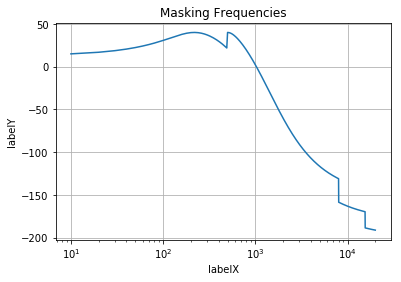

Data written to /tmp/comp28512_9k0956.wav.


<source src="data:audio/wav;base64,UklGRpw+AABXQVZFZm10IBAAAAABAAEA6AMAAEAfAAAIAEAAZGF0YXg+AAAKAAAAAAAAABQAAAAA
AAAAHgAAAAAAAAAoAAAAAAAAADIAAAAAAAAAPAAAAAAAAABGAAAAAAAAAFAAAAAAAAAAWgAAAAAA
AABkAAAAAAAAAG4AAAAAAAAAeAAAAAAAAACCAAAAAAAAAIwAAAAAAAAAlgAAAAAAAACgAAAAAAAA
AKoAAAAAAAAAtAAAAAAAAAC+AAAAAAAAAMgAAAAAAAAA0gAAAAAAAADcAAAAAAAAAOYAAAAAAAAA
8AAAAAAAAAD6AAAAAAAAAAQBAAAAAAAADgEAAAAAAAAYAQAAAAAAACIBAAAAAAAALAEAAAAAAAA2
AQAAAAAAAEABAAAAAAAASgEAAAAAAABUAQAAAAAAAF4BAAAAAAAAaAEAAAAAAAByAQAAAAAAAHwB
AAAAAAAAhgEAAAAAAACQAQAAAAAAAJoBAAAAAAAApAEAAAAAAACuAQAAAAAAALgBAAAAAAAAwgEA
AAAAAADMAQAAAAAAANYBAAAAAAAA4AEAAAAAAADqAQAAAAAAAPQBAAAAAAAA/gEAAAAAAAAIAgAA
AAAAABICAAAAAAAAHAIAAAAAAAAmAgAAAAAAADACAAAAAAAAOgIAAAAAAABEAgAAAAAAAE4CAAAA
AAAAWAIAAAAAAABiAgAAAAAAAGwCAAAAAAAAdgIAAAAAAACAAgAAAAAAAIoCAAAAAAAAlAIAAAAA
AACeAgAAAAAAAKgCAAAAAAAAsgIAAAAAAAC8AgAAAAAAAMYCAAAAAAAA0AIAAAAAAADaAgAAAAAA
AOQCAAAAAAAA7gIAAAAAAAD4AgAAAAAAAAIDAAAAAAAADAMAAAAAAAAWAwAAAAAAACADAAAAAAAA
KgMAAAAAAAA0AwAAAAAAAD4DAAAAAAAASAMAAAAAAABSAwAAAAAAAFwDAAAAAAAAZgMAAAAAAABw
AwAAAAAAAHoDAAAAAAAAhAMAAAAAAACOAwAAAAAAAJgDAAAAAAAAogMAAAAAAACsAwAAAAAAALYD
AAAAAAAAwAMAAAAAAADKAwAAAAAAANQDAAAAAAAA3gMAAAAAAADoAwAAAAAAAPIDAAAAAAAA/AMA
AAAAAAAGBAAAAAAAABAEAAAAAAAAGgQAAAAAAAAkBAAAAAAAAC4EAAAAAAAAOAQAAAAAAABCBAAA
AAAAAEwEAAAAAAAAVgQAAAAAAABgBAAAAAAAAGoEAAAAAAAAdAQAAAAAAAB+BAAAAAAAAIgEAAAA
AAAAkgQAAAAAAACcBAAAAAAAAKYEAAAAAAAAsAQAAAAAAAC6BAAAAAAAAMQEAAAAAAAAzgQAAAAA
AADYBAAAAAAAAOIEAAAAAAAA7AQAAAAAAAD2BAAAAAAAAAAFAAAAAAAACgUAAAAAAAAUBQAAAAAA
AB4FAAAAAAAAKAUAAAAAAAAyBQAAAAAAADwFAAAAAAAARgUAAAAAAABQBQAAAAAAAFoFAAAAAAAA
ZAUAAAAAAABuBQAAAAAAAHgFAAAAAAAAggUAAAAAAACMBQAAAAAAAJYFAAAAAAAAoAUAAAAAAACq
BQAAAAAAALQFAAAAAAAAvgUAAAAAAADIBQAAAAAAANIFAAAAAAAA3AUAAAAAAADmBQAAAAAAAPAF
AAAAAAAA+gUAAAAAAAAEBgAAAAAAAA4GAAAAAAAAGAYAAAAAAAAiBgAAAAAAACwGAAAAAAAANgYA
AAAAAABABgAAAAAAAEoGAAAAAAAAVAYAAAAAAABeBgAAAAAAAGgGAAAAAAAAcgYAAAAAAAB8BgAA
AAAAAIYGAAAAAAAAkAYAAAAAAACaBgAAAAAAAKQGAAAAAAAArgYAAAAAAAC4BgAAAAAAAMIGAAAA
AAAAzAYAAAAAAADWBgAAAAAAAOAGAAAAAAAA6gYAAAAAAAD0BgAAAAAAAP4GAAAAAAAACAcAAAAA
AAASBwAAAAAAABwHAAAAAAAAJgcAAAAAAAAwBwAAAAAAADoHAAAAAAAARAcAAAAAAABOBwAAAAAA
AFgHAAAAAAAAYgcAAAAAAABsBwAAAAAAAHYHAAAAAAAAgAcAAAAAAACKBwAAAAAAAJQHAAAAAAAA
ngcAAAAAAACoBwAAAAAAALIHAAAAAAAAvAcAAAAAAADGBwAAAAAAANAHAAAAAAAA2gcAAAAAAADk
BwAAAAAAAO4HAAAAAAAA+AcAAAAAAAACCAAAAAAAAAwIAAAAAAAAFggAAAAAAAAgCAAAAAAAACoI
AAAAAAAANAgAAAAAAAA+CAAAAAAAAEgIAAAAAAAAUggAAAAAAABcCAAAAAAAAGYIAAAAAAAAcAgA
AAAAAAB6CAAAAAAAAIQIAAAAAAAAjggAAAAAAACYCAAAAAAAAKIIAAAAAAAArAgAAAAAAAC2CAAA
AAAAAMAIAAAAAAAAyggAAAAAAADUCAAAAAAAAN4IAAAAAAAA6AgAAAAAAADyCAAAAAAAAPwIAAAA
AAAABgkAAAAAAAAQCQAAAAAAABoJAAAAAAAAJAkAAAAAAAAuCQAAAAAAADgJAAAAAAAAQgkAAAAA
AABMCQAAAAAAAFYJAAAAAAAAYAkAAAAAAABqCQAAAAAAAHQJAAAAAAAAfgkAAAAAAACICQAAAAAA
AJIJAAAAAAAAnAkAAAAAAACmCQAAAAAAALAJAAAAAAAAugkAAAAAAADECQAAAAAAAM4JAAAAAAAA
2AkAAAAAAADiCQAAAAAAAOwJAAAAAAAA9gkAAAAAAAAACgAAAAAAAAoKAAAAAAAAFAoAAAAAAAAe
CgAAAAAAACgKAAAAAAAAMgoAAAAAAAA8CgAAAAAAAEYKAAAAAAAAUAoAAAAAAABaCgAAAAAAAGQK
AAAAAAAAbgoAAAAAAAB4CgAAAAAAAIIKAAAAAAAAjAoAAAAAAACWCgAAAAAAAKAKAAAAAAAAqgoA
AAAAAAC0CgAAAAAAAL4KAAAAAAAAyAoAAAAAAADSCgAAAAAAANwKAAAAAAAA5goAAAAAAADwCgAA
AAAAAPoKAAAAAAAABAsAAAAAAAAOCwAAAAAAABgLAAAAAAAAIgsAAAAAAAAsCwAAAAAAADYLAAAA
AAAAQAsAAAAAAABKCwAAAAAAAFQLAAAAAAAAXgsAAAAAAABoCwAAAAAAAHILAAAAAAAAfAsAAAAA
AACGCwAAAAAAAJALAAAAAAAAmgsAAAAAAACkCwAAAAAAAK4LAAAAAAAAuAsAAAAAAADCCwAAAAAA
AMwLAAAAAAAA1gsAAAAAAADgCwAAAAAAAOoLAAAAAAAA9AsAAAAAAAD+CwAAAAAAAAgMAAAAAAAA
EgwAAAAAAAAcDAAAAAAAACYMAAAAAAAAMAwAAAAAAAA6DAAAAAAAAEQMAAAAAAAATgwAAAAAAABY
DAAAAAAAAGIMAAAAAAAAbAwAAAAAAAB2DAAAAAAAAIAMAAAAAAAAigwAAAAAAACUDAAAAAAAAJ4M
AAAAAAAAqAwAAAAAAACyDAAAAAAAALwMAAAAAAAAxgwAAAAAAADQDAAAAAAAANoMAAAAAAAA5AwA
AAAAAADuDAAAAAAAAPgMAAAAAAAAAg0AAAAAAAAMDQAAAAAAABYNAAAAAAAAIA0AAAAAAAAqDQAA
AAAAADQNAAAAAAAAPg0AAAAAAABIDQAAAAAAAFINAAAAAAAAXA0AAAAAAABmDQAAAAAAAHANAAAA
AAAAeg0AAAAAAACEDQAAAAAAAI4NAAAAAAAAmA0AAAAAAACiDQAAAAAAAKwNAAAAAAAAtg0AAAAA
AADADQAAAAAAAMoNAAAAAAAA1A0AAAAAAADeDQAAAAAAAOgNAAAAAAAA8g0AAAAAAAD8DQAAAAAA
AAYOAAAAAAAAEA4AAAAAAAAaDgAAAAAAACQOAA

In [202]:
F2=1000
A1dB_SPL = 40 # Power of F1 masker in dB rel to Pref
f = np.arange(1,2000)*10


f1d = f - F1


z1d = 13 * np.arctan(0.00076 * f1d) + 3.5 * np.arctan((f1d / 7500) ** 2) # Barks

SFdB1 = 15.81 + 7.5 * (z1d + 0.474) - 17.5 * np.sqrt(1 + (z1d + 0.474) ** 2)
    
SFdB1 = SFdB1 + A1dB_SPL # Add DBs

plt.semilogx(f,SFdB1) 
plt.grid(True)
plt.title('Masking Frequencies')
plt.xlabel('labelX')
plt.ylabel('labelY')
plt.show()

Audio(f, rate=1000)

## Q1: Do your results compare reasonably?

## Q2: What does the dB scale refer to in each graph (i.e. what is the reference)?